
<a href="https://colab.research.google.com/github/kokchun/Databehandling-AI22/blob/main/Exercises/E00_pandas_basic_syntax.ipynb" target="_parent"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a> &nbsp; to see hints and answers.

# pandas fundamentals exercises

---
These are introductory exercises in Pandas with focus in **syntax, DataFrame, indexing, data selection** and **data cleaning**.

<p class = "alert alert-info" role="alert"><b>Note</b> that there are usually many ways to achieve same results using operations in pandas. Feel free to investigate several ways. </p>

<p class = "alert alert-info" role="alert"><b>Note</b> that in cases when you start to repeat code, try not to. Create functions to reuse code instead. </p>

<p class = "alert alert-info" role="alert"><b>Remember</b> to use <b>descriptive variable, function, index </b> and <b> column names</b> in order to get readable code </p>

<p class = "alert alert-info" role="alert"><b>Remember</b> to format your input questions in a pedagogical way to guide the user

The number of stars (\*), (\*\*), (\*\*\*) denotes the difficulty level of the task

---

## 1. Cities in Sweden - create dataset (*)

Create this DataFrame from scratch: 

|    | Kommun    |   Population |
|---:|:----------|-------------:|
|  0 | Malmö     |       347949 |
|  1 | Stockholm |       975551 |
|  2 | Uppsala   |       233839 |
|  3 | Göteborg  |       583056 |

&nbsp; a) Use your DataFrame to print out all the cities. (*)

&nbsp; b) Select only the row which contains Göteborg. Do this by using the name Göteborg. (*)

&nbsp; c) Sort the cities by population from largest to smallest. (*)

&nbsp; d) Filter out the three largest cities. (*)

&nbsp; e) The whole population in Sweden 2020 is 10379295. Use this number to create a new column in your sorted DataFrame named: Population (%). This column should be filled with percentage of the Swedish population for each city. 


<details>

<summary>Answer</summary>

a) 

```
0        Malmö
1    Stockholm
2      Uppsala
3     Göteborg
```

b)

|    | Kommun   |   Population |
|---:|:---------|-------------:|
|  3 | Göteborg |       583056 |

c) 

|    | Kommun    |   Population |
|---:|:----------|-------------:|
|  0 | Stockholm |       975551 |
|  1 | Göteborg  |       583056 |
|  2 | Malmö     |       347949 |
|  3 | Uppsala   |       233839 |


d)

|    | Kommun    |   Population |
|---:|:----------|-------------:|
|  0 | Stockholm |       975551 |
|  1 | Göteborg  |       583056 |
|  2 | Malmö     |       347949 |

e)

|    | Kommun    |   Population |   Population (%) |
|---:|:----------|-------------:|-----------------:|
|  0 | Stockholm |       975551 |              9.4 |
|  1 | Göteborg  |       583056 |              5.6 |
|  2 | Malmö     |       347949 |              3.4 |
|  3 | Uppsala   |       233839 |              2.3 |

</details>


In [29]:
import pandas as pd

cities_and_population_in_sweden = {
    'Kommun': ['Malmö', 'Stockholm', 'Uppsala', 'Göteborg'],
    'Population': [347949, 975551, 233839, 583056]
}
df = pd.DataFrame(cities_and_population_in_sweden)
print('Dataframe:')
print(df)

# a)
print('\nAll cities:')
print(df['Kommun'])

Dataframe:
      Kommun  Population
0      Malmö      347949
1  Stockholm      975551
2    Uppsala      233839
3   Göteborg      583056

All cities:
0        Malmö
1    Stockholm
2      Uppsala
3     Göteborg
Name: Kommun, dtype: object


In [7]:
# b)
print('Row for Göteborg:')
print(df[df['Kommun'] == 'Göteborg'])

Row for Göteborg:
     Kommun  Population
3  Göteborg      583056


In [10]:
# c)
df_sorted = df.sort_values(by='Population', ascending=False)
print('Cities sorted by population (largest to smallest):')
df_sorted = df_sorted.reset_index(drop=True)
print(df_sorted)

Cities sorted by population (largest to smallest):
      Kommun  Population
0  Stockholm      975551
1   Göteborg      583056
2      Malmö      347949
3    Uppsala      233839


In [11]:
# d)
three_largest = df_sorted.head(3)
print('The three largest cities:')
print(three_largest)

The three largest cities:
      Kommun  Population
0  Stockholm      975551
1   Göteborg      583056
2      Malmö      347949


In [12]:
# e)
sweden_population = 10379295
df_sorted['Population (%)'] = (df_sorted['Population'] / sweden_population) * 100
print('Percentage of population for each city:')
print(df_sorted)

Percentage of population for each city:
      Kommun  Population  Population (%)
0  Stockholm      975551        9.399010
1   Göteborg      583056        5.617491
2      Malmö      347949        3.352338
3    Uppsala      233839        2.252937


---

## 2. Cities in Sweden - real dataset (*)

Download the file komtopp50_2020.xlsx from the course github repo. The data is taken from SCB. 

&nbsp; a) Read in the tab "Totalt" into a DataFrame and start exploring the data with some simple explorations such as

```python
df.head()
df.info()
df.describe()
```

Feel free to do more explorations. (*)

&nbsp; b) Clean your data so that the head looks like this: (*)


|    |   Rang 2020 |   Rang 2019 | Kommun   |   Folkmängd 2020 |   Folkmängd 2019 |   Förändring |
|---:|------------:|------------:|:---------|-----------------:|-----------------:|-------------:|
|  0 |          83 |          84 | Ale      |            31868 |            31402 |     1.48398  |
|  1 |          64 |          64 | Alingsås |            41602 |            41420 |     0.439401 |
|  2 |         123 |         123 | Alvesta  |            20224 |            20134 |     0.447005 |
|  3 |         255 |         255 | Aneby    |             6821 |             6848 |    -0.394276 |
|  4 |         169 |         167 | Arboga   |            14039 |            14087 |    -0.34074  |

&nbsp; c) Sort the cities by population from largest to smallest. (*)

&nbsp; d) Filter out the five smallest cities. (*)

&nbsp; e) Use the DataFrame to calculate Sweden's population in 2019 and 2020. (*)

&nbsp; f) Plot a bar chart for the five largest cities and the five smallest cities. (*) 

<details>

<summary>Hint</summary>

a) Use
```python
pd.read_excel(path, header = ..., usecols="Letter1:LetterN", sheet_name="...")
```

</details>

<details>

<summary>Answer</summary>

b)

|    | Kommun   |   Population |
|---:|:---------|-------------:|
|  3 | Göteborg |       583056 |

c) 


|    |   Rang 2020 |   Rang 2019 | Kommun    |   Folkmängd 2020 |   Folkmängd 2019 |   Förändring |
|---:|------------:|------------:|:----------|-----------------:|-----------------:|-------------:|
|  0 |           1 |           1 | Stockholm |           975551 |           974073 |     0.151734 |
|  1 |           2 |           2 | Göteborg  |           583056 |           579281 |     0.65167  |
|  2 |           3 |           3 | Malmö     |           347949 |           344166 |     1.09918  |
|  3 |           4 |           4 | Uppsala   |           233839 |           230767 |     1.33121  |
|  4 |           5 |           5 | Linköping |           164616 |           163051 |     0.959822 |


d)

|     |   Rang 2020 |   Rang 2019 | Kommun   |   Folkmängd 2020 |   Folkmängd 2019 |   Förändring |
|----:|------------:|------------:|:---------|-----------------:|-----------------:|-------------:|
| 289 |         290 |         290 | Bjurholm |             2387 |             2408 |    -0.872093 |
| 288 |         289 |         289 | Sorsele  |             2442 |             2489 |    -1.88831  |
| 287 |         288 |         288 | Dorotea  |             2498 |             2551 |    -2.07762  |
| 286 |         287 |         287 | Arjeplog |             2718 |             2785 |    -2.40575  |
| 285 |         286 |         286 | Åsele    |             2805 |             2794 |     0.393701 |

e)

```
Populationen i Sverige 2020: 10379295
Populationen i Sverige 2019: 10327589
```

f)

<img align="left" src="../assets/city_sizes.png" height="200"/>

</details>


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# a)
df = pd.read_excel(
    'Data/komtopp50_2020.xlsx',
    sheet_name='Totalt',        # vilket flikblad i Excel-filen som ska användas
    header=6,                   # 7:e raden i filen innehåller kolumnrubrikerna (index 6)
    usecols='A:F')              # läser bara in kolumnerna A till F

print('First rows:')
print(f'{df.head()}\n')
print('Information about the dataset:')
print(f'{df.info()}\n')    # Print visar värdet som text i konsolen
print('Summary statistics:')
df.describe()    # Jupyter visar returnerade värdet automatiskt (i detta fall en tabellformatering)

First rows:
   2020  2019 Unnamed: 2  2020.1  2019.1         %
0    83    84        Ale   31868   31402  1.483982
1    64    64   Alingsås   41602   41420  0.439401
2   123   123    Alvesta   20224   20134  0.447005
3   255   255      Aneby    6821    6848 -0.394276
4   169   167     Arboga   14039   14087 -0.340740

Information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290 entries, 0 to 289
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   2020        290 non-null    int64  
 1   2019        290 non-null    int64  
 2   Unnamed: 2  290 non-null    object 
 3   2020.1      290 non-null    int64  
 4   2019.1      290 non-null    int64  
 5   %           290 non-null    float64
dtypes: float64(1), int64(4), object(1)
memory usage: 13.7+ KB
None

Summary statistics:


,2020,2019,2020.1,2019.1,%
count,290.000000,290.000000,290.000000,290.000000,290.000000
mean,145.500000,145.496552,35790.672414,35612.375862,0.154672
std,83.860002,83.856743,74627.031657,74292.525065,0.953047
min,1.000000,1.000000,2387.000000,2408.000000,-3.208917
25%,73.250000,73.250000,10014.500000,10075.000000,-0.392807
50%,145.500000,145.500000,16079.500000,15978.000000,0.147039
75%,217.750000,217.750000,36215.250000,36096.750000,0.737224
max,290.000000,290.000000,975551.000000,974073.000000,4.088165


In [22]:
# b)
df.columns = ['Rang 2020', 'Rang 2019', 'Kommun', 'Folkmängd 2020', 'Folkmängd 2019', 'Förändring']    # byter namn på kolumnerna
df = df.dropna(subset=['Kommun'])    # tar bort alla rader där kolumnen Kommun saknar värde (NaN = Not a Number)
df = df[df["Rang 2020"] != "Rang"]    # tar bort rader där rubrikraden upprepas mitt i datan

# gör om kolumnerna till riktiga siffror (numeriska värden)
df['Rang 2020'] = pd.to_numeric(df['Rang 2020'], errors='coerce')    # errors='coerce -> om texten inte går att omvandla så blir det NaN istället för att krascha
df['Rang 2019'] = pd.to_numeric(df['Rang 2019'], errors='coerce')
df['Folkmängd 2020'] = pd.to_numeric(df['Folkmängd 2020'], errors='coerce')
df['Folkmängd 2019'] = pd.to_numeric(df['Folkmängd 2019'], errors='coerce')
df['Förändring'] = pd.to_numeric(df['Förändring'], errors='coerce')

df = df.reset_index(drop=True)    # nollställer radnumreringen (index)

print('Cleaned data:')
df.head()

Cleaned data:


,Rang 2020,Rang 2019,Kommun,Folkmängd 2020,Folkmängd 2019,Förändring
0,83,84,Ale,31868,31402,1.483982
1,64,64,Alingsås,41602,41420,0.439401
2,123,123,Alvesta,20224,20134,0.447005
3,255,255,Aneby,6821,6848,-0.394276
4,169,167,Arboga,14039,14087,-0.340740


In [21]:
# c)
df_sorted = df.sort_values(by='Folkmängd 2020', ascending=False)
df_sorted = df_sorted.reset_index(drop=True)

print('Cities sorted by population (largest to smallest):')
df_sorted.head()

Cities sorted by population (largest to smallest):


,Rang 2020,Rang 2019,Kommun,Folkmängd 2020,Folkmängd 2019,Förändring
0,1,1,Stockholm,975551,974073,0.151734
1,2,2,Göteborg,583056,579281,0.651670
2,3,3,Malmö,347949,344166,1.099179
3,4,4,Uppsala,233839,230767,1.331213
4,5,5,Linköping,164616,163051,0.959822


In [ ]:
# d)
five_smallest = df_sorted.tail(5)
five_smallest = five_smallest.reset_index(drop=True)
print('The five smallest cities:')
five_smallest

The five smallest cities:


,Rang 2020,Rang 2019,Kommun,Folkmängd 2020,Folkmängd 2019,Förändring
0,286,286,Åsele,2805,2794,0.393701
1,287,287,Arjeplog,2718,2785,-2.405745
2,288,288,Dorotea,2498,2551,-2.077617
3,289,289,Sorsele,2442,2489,-1.888309
4,290,290,Bjurholm,2387,2408,-0.872093


In [18]:
# e)
total_2019 = df['Folkmängd 2019'].sum()
total_2020 = df['Folkmängd 2020'].sum()
print(f'Sveriges totala folkmängd 2019: {total_2019:,.0f}')    # :,.0f gör att talet skrivs med tusentalsavgränsning och utan decimaler
print(f'Sveriges totala folkmängd 2020: {total_2020:,.0f}\n')

Sveriges totala folkmängd 2019: 10,327,589
Sveriges totala folkmängd 2020: 10,379,295



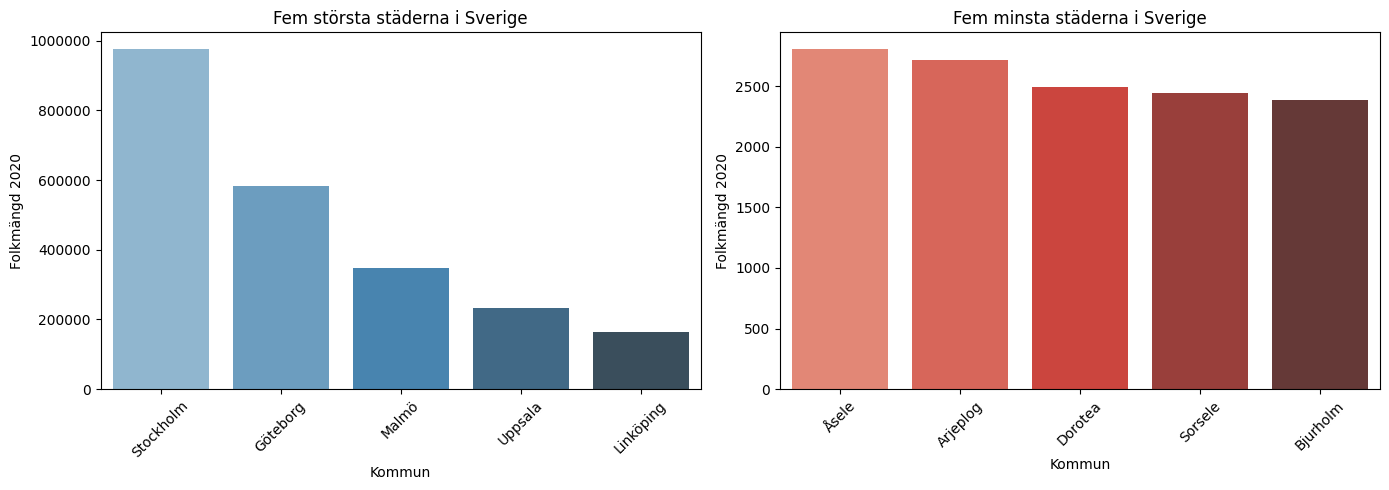

In [30]:
# f)
five_largest = df_sorted.head(5)
five_smallest = df_sorted.tail(5)

# Skapa subplots – 1 rad (bredvid varandra), 2 kolumner (två subplots)
fig, axes = plt.subplots(1, 2, figsize=(14, 5))    # axes är en lista med två ax-objekt: axes[0] och axes[1].

# Skapar ett stapeldiagram med Seaborn.
sns.barplot(
    data=five_largest,    # anger vilken tabell som används
    x='Kommun',           # x och y anger vilka kolumner som ska användas
    y='Folkmängd 2020',
    palette='Blues_d',
    hue='Kommun',
    ax=axes[0],           # betyder att detta ska ritas i vänstra subploten
    legend=False)

axes[0].set_title('Fem största städerna i Sverige')
axes[0].set_xlabel('Kommun')
axes[0].set_ylabel('Folkmängd 2020')
axes[0].tick_params(axis='x', rotation=45)    # rotation=45 roterar stadnamnen så de inte krockar
axes[0].ticklabel_format(style='plain', axis='y')    # gör så att y-axeln visar t.ex. 1000000 istället för 1e6

sns.barplot(
    data=five_smallest,
    x='Kommun', y='Folkmängd 2020',
    palette='Reds_d',
    hue='Kommun',
    ax=axes[1],
    legend=False)

axes[1].set_title('Fem minsta städerna i Sverige')
axes[1].set_xlabel('Kommun')
axes[1].set_ylabel('Folkmängd 2020')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()    # gör så att titlar/etiketter inte krockar
plt.show()

---

## 3. Cities in Sweden - gender (*)

We continue with the same Excel-file as in task 2, but now you should also read in the sheets "Kvinnor" and "Män" into two additional DataFrames. In this task, many operations are similar to all three datasets, try creating custom made functions to reuse as much code as possible.

&nbsp; a) Clean your data so that the head looks like this: (*)

Male: 

|    |   Rang 2020 |   Rang 2019 | Kommun   |   Folkmängd 2020 |   Folkmängd 2019 |   Förändring | Kön   |
|---:|------------:|------------:|:---------|-----------------:|-----------------:|-------------:|:------|
|  0 |          81 |          83 | Ale      |            16256 |            16054 |     1.25825  | Man   |
|  1 |          64 |          64 | Alingsås |            20702 |            20646 |     0.271239 | Man   |
|  2 |         122 |         123 | Alvesta  |            10367 |            10339 |     0.270819 | Man   |
|  3 |         255 |         255 | Aneby    |             3503 |             3498 |     0.142939 | Man   |
|  4 |         169 |         168 | Arboga   |             7094 |             7114 |    -0.281136 | Man   |

Female: 

|    |   Rang 2020 |   Rang 2019 | Kommun   |   Folkmängd 2020 |   Folkmängd 2019 |   Förändring | Kön    |
|---:|------------:|------------:|:---------|-----------------:|-----------------:|-------------:|:-------|
|  0 |          84 |          85 | Ale      |            15612 |            15348 |     1.72009  | Kvinna |
|  1 |          64 |          64 | Alingsås |            20900 |            20774 |     0.606527 | Kvinna |
|  2 |         123 |         123 | Alvesta  |             9857 |             9795 |     0.632976 | Kvinna |
|  3 |         255 |         255 | Aneby    |             3318 |             3350 |    -0.955224 | Kvinna |
|  4 |         165 |         164 | Arboga   |             6945 |             6973 |    -0.401549 | Kvinna |


&nbsp; b) Merge the male and female DataFrames vertically and set index to "Kommun". Note that there now should be 580 rows now.  (*)

|    | Kommun   |   Folkmängd 2020 |   Folkmängd 2019 |   Förändring | Kön   |
|---:|:---------|-----------------:|-----------------:|-------------:|:------|
|  0 | Ale      |            16256 |            16054 |     1.25825  | Man   |
|  1 | Alingsås |            20702 |            20646 |     0.271239 | Man   |
|   ...  | ...       | ...  | ...   | ...  | ...    |
| 288 | Överkalix    |             1559 |             1578 |    -1.20406  | Kvinna |
| 289 | Övertorneå   |             2027 |             2065 |    -1.84019  | Kvinna |

&nbsp; c) Extract and change column name from the total DataFrame so that the head look like this: (*) 

|    | Kommun   |   Total Pop 2020 |   Total Pop 2019 |   Total förändring |
|---:|:---------|-----------------:|-----------------:|-------------------:|
|  0 | Ale      |            31868 |            31402 |           1.48398  |
|  1 | Alingsås |            41602 |            41420 |           0.439401 |
|  2 | Alvesta  |            20224 |            20134 |           0.447005 |
|  3 | Aneby    |             6821 |             6848 |          -0.394276 |
|  4 | Arboga   |            14039 |            14087 |          -0.34074  |

&nbsp; d) Merge this data with the data in b) so that the head look like this: (*)

| Kommun    |   Folkmängd 2020 |   Folkmängd 2019 |   Förändring | Kön    |   Total Pop 2020 |   Total Pop 2019 |   Total förändring |
|:----------|-----------------:|-----------------:|-------------:|:-------|-----------------:|-----------------:|-------------------:|
| Stockholm |           482982 |           482220 |     0.158019 | Man    |           975551 |           974073 |           0.151734 |
| Stockholm |           492569 |           491853 |     0.145572 | Kvinna |           975551 |           974073 |           0.151734 |
| Göteborg  |           292505 |           290308 |     0.756782 | Man    |           583056 |           579281 |           0.65167  |
| Göteborg  |           290551 |           288973 |     0.546072 | Kvinna |           583056 |           579281 |           0.65167  |
| Malmö     |           175411 |           173543 |     1.07639  | Kvinna |           347949 |           344166 |           1.09918  |

&nbsp; e) Create barplots showing the gender populations of Swedens 10 largest and 10 smallest cities. (*) 
 
&nbsp; f) Create a pie chart showing the total male and female population in Sweden 2020. (*)

&nbsp; g) Create a barplot showing the cities with the five largest percentual gender difference in 2020. (**)

&nbsp; h) Create a barplot showing the top 5 cities with largest populational growth from 2019 to 2020 (**)

&nbsp; i) Feel free to investigate other questions you are interested in using these datasets. (*), (**)

<br/>

<details>

<summary>Hint</summary>

f) You need to process the data first. For example

- compute difference between males and females in 2020
- use this difference to compute the differences in percentage
- sort the values by this percentage difference
- use seaborn barplot to plot, with the gender as hue

</details>

<br/>

<details>

<summary>Answer</summary>

e)

<img src="../assets/population_gender.png" height="200"/>

f)

<img src="../assets/population_genders_pie.png" height="200"/>

g)

<img src="../assets/cities_largest_gender_diff.png" height="200"/>

h)

<img src="../assets/pop_change.png" height="200"/>

</details>


In [ ]:
import pandas as pd

# a)
df_män = pd.read_excel('Data/komtopp50_2020.xlsx', sheet_name='Män', header=6)
df_kvinnor = pd.read_excel('Data/komtopp50_2020.xlsx', sheet_name='Kvinnor', header=6)

df_män.columns = ['Rang 2020', 'Rang 2019', 'Kommun', 'Folkmängd 2020', 'Folkmängd 2019', 'Förändring']
df_kvinnor.columns = ['Rang 2020', 'Rang 2019', 'Kommun', 'Folkmängd 2020', 'Folkmängd 2019', 'Förändring']

df_män['Kön'] = 'Man'
df_kvinnor['Kön'] = 'Kvinna'

print('Male:')
print(f'{df_män.head()}\n')
print('Female:')
print(f'{df_kvinnor.head()}')

Male:
   Rang 2020  Rang 2019    Kommun  Folkmängd 2020  Folkmängd 2019  Förändring  \
0         81         83       Ale           16256           16054    1.258253   
1         64         64  Alingsås           20702           20646    0.271239   
2        122        123   Alvesta           10367           10339    0.270819   
3        255        255     Aneby            3503            3498    0.142939   
4        169        168    Arboga            7094            7114   -0.281136   

   Kön  
0  Man  
1  Man  
2  Man  
3  Man  
4  Man  

Female:
   Rang 2020  Rang 2019    Kommun  Folkmängd 2020  Folkmängd 2019 Förändring  \
0         84         85       Ale           15612           15348   1.720094   
1         64         64  Alingsås           20900           20774   0.606527   
2        123        123   Alvesta            9857            9795   0.632976   
3        255        255     Aneby            3318            3350  -0.955224   
4        165        164    Arboga           

In [30]:
# b)
df_gender = pd.concat([df_män, df_kvinnor])          # Slå ihop raderna vertikalt
df_gender = df_gender[['Kommun', 'Folkmängd 2020', 'Folkmängd 2019', 'Förändring', 'Kön']]  # behåll bara dessa kolumner
df_gender.set_index('Kommun', inplace=True)          # sätt kommun som index

df_gender

,Folkmängd 2020,Folkmängd 2019,Förändring,Kön
Kommun,,,,
Ale,16256,16054,1.258253,Man
Alingsås,20702,20646,0.271239,Man
Alvesta,10367,10339,0.270819,Man
Aneby,3503,3498,0.142939,Man
Arboga,7094,7114,-0.281136,Man
...,...,...,...,...
Österåker,22997,22442,2.473042,Kvinna
Östhammar,10846,10803,0.398038,Kvinna
Östra Göinge,7270,7262,0.110162,Kvinna


In [ ]:
# c)
df_gender['Förändring'] = pd.to_numeric(df_gender['Förändring'], errors='coerce') # gör om text till siffror (och byter felaktiga värden till NaN)

df = (
    df_gender
    .groupby('Kommun')[['Folkmängd 2020', 'Folkmängd 2019', 'Förändring']]    # groupby('Kommun').sum() summerar nu även kolumnen 'Förändring'
    .sum()
)

df.columns = ['Total pop 2020', 'Total pop 2019', 'Total förändring']
df = df.reset_index()

df

,Kommun,Total pop 2020,Total pop 2019,Total förändring
0,Ale,31868,31402,2.978347
1,Alingsås,41602,41420,0.877766
2,Alvesta,20224,20134,0.903795
3,Aneby,6821,6848,-0.812285
4,Arboga,14039,14087,-0.682685
...,...,...,...,...
285,Österåker,46644,45574,4.699395
286,Östhammar,22251,22250,0.031129
287,Östra Göinge,15017,15007,0.135986
288,Överkalix,3289,3315,-1.607049


In [29]:
df_merge = pd.merge(df_gender, df, on='Kommun')    # slår ihop tabellerna på kolumnen “Kommun”, alltså kommunnamnet som gemensam nyckel

df_merge


,Kommun,Rang 2020,Rang 2019,Folkmängd 2020,Folkmängd 2019,Förändring,Kön,Total pop 2020,Total pop 2019,Total förändring
0,Ale,81,83,16256,16054,1.258253,Man,31868,31402,2.978347
1,Alingsås,64,64,20702,20646,0.271239,Man,41602,41420,0.877766
2,Alvesta,122,123,10367,10339,0.270819,Man,20224,20134,0.903795
3,Aneby,255,255,3503,3498,0.142939,Man,6821,6848,-0.812285
4,Arboga,169,168,7094,7114,-0.281136,Man,14039,14087,-0.682685
...,...,...,...,...,...,...,...,...,...,...
575,Österåker,55,57,22997,22442,2.473042,Kvinna,46644,45574,4.699395
576,Östhammar,117,118,10846,10803,0.398038,Kvinna,22251,22250,0.031129
577,Östra Göinge,160,159,7270,7262,0.110162,Kvinna,15017,15007,0.135986
578,Överkalix,284,284,1559,1578,-1.204056,Kvinna,3289,3315,-1.607049


---

Kokchun Giang

[LinkedIn][linkedIn_kokchun]

[GitHub portfolio][github_portfolio]

[linkedIn_kokchun]: https://www.linkedin.com/in/kokchungiang/
[github_portfolio]: https://github.com/kokchun/Portfolio-Kokchun-Giang

---